In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
os.chdir("../")
from tqdm import tqdm
# from src.utils.get_datasets import getDataTF, getDataHF
from src.data.processing_data import Format
from src.models.pipelines import Pipeline
from src.models.encoders import TransformersEncoder
from src.utils.models_utils import _confusion_matrix


sns.set_theme()

2023-03-12 18:15:06.342364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 18:15:07.050687: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-12 18:15:07.050784: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-12 18:15:07.050790: W 

In [2]:
_dataset = "dyda_da"

In [3]:
df = pd.read_csv(f"./inputs_data/data_{_dataset}_test.csv", encoding="utf-8",  sep="|")
df.head()

,Utterance,Dialogue_ID,Label
0,"hey man , you wanna buy some weed ?",1,directive
1,some what ?,1,question
2,"weed ! you know ? pot , ganja , mary jane some...",1,directive
3,"oh , umm , no thanks .",1,commissive
4,i also have blow if you prefer to do a few lin...,1,directive


In [4]:
# frequency of each dialog acts 
df.value_counts("Label")

Label
inform        3534
question      2210
directive     1278
commissive     718
dtype: int64

In [5]:
# number of distinct label i the dataset
len(df["Label"].unique())

4

In [6]:
# number of distinct dialogue i the dataset
len(df["Dialogue_ID"].unique())

1000

In [7]:
dimDialogAct, Contexts, Labels = Format(_dataset, 5, "spread").get_contexts_labels()

2023-03-12 18:15:15.185019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 18:15:15.895766: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13581 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5


In [8]:
Labels[2].shape

TensorShape([741, 5, 4])

In [9]:
Contexts[2][0]

['hey man , you wanna buy some weed ?',
 'some what ?',
 'weed ! you know ? pot , ganja , mary jane some chronic !',
 'oh , umm , no thanks .',
 'i also have blow if you prefer to do a few lines .']

In [10]:
# TransformersEncoder('xlnet-base-cased', "spread", 50).batch_embedding(Contexts[0])

## Testing Pipeline working

In [11]:
_pipeline = Pipeline(
    "dyda_da",
    "spread",
    5,
    'bert-base-uncased',
    "GRU")
_pipeline.summarize()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 8269/8269 [08:50<00:00, 15.59it/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['

Epoch 1/500


2023-03-12 18:26:01.669956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500


  1/517 [..............................] - ETA: 21:44 - loss: 2.7785

2023-03-12 18:26:01.960562: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f9b3801fc90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-12 18:26:01.960601: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-03-12 18:26:01.965899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-12 18:26:02.111577: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


517/517 [==============================] - 7s 8ms/step - loss: 0.4702 - val_loss: 0.3934
Epoch 2/500
517/517 [==============================] - 4s 8ms/step - loss: 0.3318 - val_loss: 0.3290
Epoch 3/500
517/517 [==============================] - 4s 7ms/step - loss: 0.3008 - val_loss: 0.3184
Epoch 4/500
517/517 [==============================] - 4s 8ms/step - loss: 0.2799 - val_loss: 0.3048
Epoch 5/500
517/517 [==============================] - 4s 7ms/step - loss: 0.2738 - val_loss: 0.3430
Epoch 6/500
517/517 [==============================] - 4s 7ms/step - loss: 0.2665 - val_loss: 0.2951
Epoch 7/500
517/517 [==============================] - 4s 8ms/step - loss: 0.2585 - val_loss: 0.2910
Epoch 8/500
517/517 [==============================] - 4s 7ms/step - loss: 0.2551 - val_loss: 0.2917
Epoch 9/500
517/517 [==============================] - 4s 7ms/step - loss: 0.2570 - val_loss: 0.2889
Epoch 10/500
517/517 [==============================] - 4s 8ms/step - loss: 0.2502 - val_loss: 0.2863
E

In [12]:
_pipeline.df_report

,dataset_name,encoder_model,decoder_model,performance
0,dyda_da,bert-base-uncased,GRU,0.836707


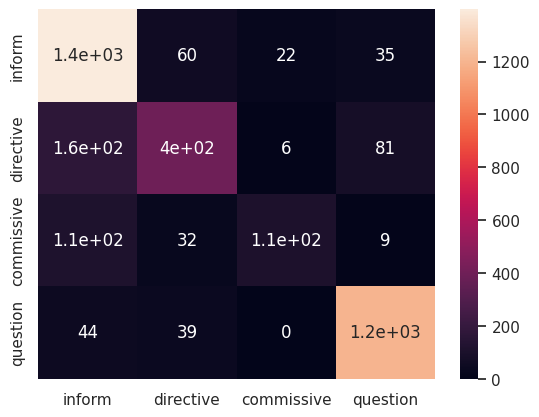

In [22]:
df_cm = pd.DataFrame(_pipeline.confusion_mat,
                     index = Format("dyda_da", 5, "spread").get_distincts_labels(),
                     columns = Format("dyda_da", 5, "spread").get_distincts_labels())
sns.heatmap(df_cm, annot=True)
plt.show()